In [2]:
## Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import mean_absolute_percentage_error

In [3]:
## Read dataset
df=pd.read_csv("car_prices.csv")

In [4]:
#Display Dataset
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [8]:
## Display information about dataset
## Begin of data preprocessing
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


In [10]:
## Display total null value number column by column
df.isnull().sum()

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65352
vin                 4
state               0
condition       11820
odometer           94
color             749
interior          749
seller              0
mmr                38
sellingprice       12
saledate           12
dtype: int64

In [12]:
## Fill numeric null values with mean values
df['year'] = df['year'].fillna(df['year'].mean())
df['condition'] = df['condition'].fillna(df['condition'].mean())
df['odometer'] = df['odometer'].fillna(df['odometer'].mean())
df['mmr'] = df['mmr'].fillna(df['mmr'].mean())
df['sellingprice'] = df['sellingprice'].fillna(df['sellingprice'].mean())

In [14]:
## Display null value number column by column
df.isnull().sum()

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65352
vin                 4
state               0
condition           0
odometer            0
color             749
interior          749
seller              0
mmr                 0
sellingprice        0
saledate           12
dtype: int64

In [16]:
## Fill null categorical values with "unknown" value
object_columns = df.select_dtypes(include=['object']).columns
df[object_columns] = df[object_columns].fillna('Unknown')

In [17]:
## Display null values without any error 
df.isnull().sum()

year            0
make            0
model           0
trim            0
body            0
transmission    0
vin             0
state           0
condition       0
odometer        0
color           0
interior        0
seller          0
mmr             0
sellingprice    0
saledate        0
dtype: int64

In [20]:
## Drop columns that will not contribute to the model
df.drop(columns=['vin','saledate'], inplace=True)

In [22]:
unique_counts = df.nunique()

print(unique_counts)

year                34
make                97
model              974
trim              1964
body                88
transmission         5
state               64
condition           42
odometer        172279
color               47
interior            18
seller           14263
mmr               1102
sellingprice      1888
dtype: int64


In [24]:
top_5_make = df["make"].value_counts().head(5).index.tolist()

print(top_5_make)

['Ford', 'Chevrolet', 'Nissan', 'Toyota', 'Dodge']


In [26]:
df["make"] = df["make"].apply(lambda x: x if x in top_5_make else "Other")

# One-Hot Encoding ve booleanları 1 ve 0'a dönüştürme
make_encoded = pd.get_dummies(df["make"]).astype(int)
df = pd.concat([df, make_encoded], axis=1)


In [28]:
## Display dataset
df.head()

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,mmr,sellingprice,Chevrolet,Dodge,Ford,Nissan,Other,Toyota
0,2015,Other,Sorento,LX,SUV,automatic,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,0,0,0,0,1,0
1,2015,Other,Sorento,LX,SUV,automatic,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,0,0,0,0,1,0
2,2014,Other,3 Series,328i SULEV,Sedan,automatic,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,0,0,0,0,1,0
3,2015,Other,S60,T5,Sedan,automatic,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,0,0,0,0,1,0
4,2014,Other,6 Series Gran Coupe,650i,Sedan,automatic,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,0,0,0,0,1,0


In [30]:
df=df.drop(columns=["make"], axis=1)

In [32]:
df.head()

,year,model,trim,body,transmission,state,condition,odometer,color,interior,seller,mmr,sellingprice,Chevrolet,Dodge,Ford,Nissan,Other,Toyota
0,2015,Sorento,LX,SUV,automatic,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,0,0,0,0,1,0
1,2015,Sorento,LX,SUV,automatic,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,0,0,0,0,1,0
2,2014,3 Series,328i SULEV,Sedan,automatic,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,0,0,0,0,1,0
3,2015,S60,T5,Sedan,automatic,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,0,0,0,0,1,0
4,2014,6 Series Gran Coupe,650i,Sedan,automatic,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,0,0,0,0,1,0


In [34]:
## Apply target encoding model column by column
categorical_columns = ['model', 'trim', 'body', 'transmission', 'state', 'color', 'interior', 'seller']
target_column = "sellingprice"
for col in categorical_columns:
    
    target_encoding = df.groupby(col)[target_column].mean().to_dict()    
    df[f"{col}_encoded"] = df[col].map(target_encoding)

df.drop(categorical_columns, axis=1, inplace=True)

In [36]:
## Display dataset
df.head()

,year,condition,odometer,mmr,sellingprice,Chevrolet,Dodge,Ford,Nissan,Other,Toyota,model_encoded,trim_encoded,body_encoded,transmission_encoded,state_encoded,color_encoded,interior_encoded,seller_encoded
0,2015,5.0,16639.0,20500.0,21500.0,0,0,0,0,1,0,14643.257923,10289.386104,15905.503680,13540.408506,14505.902786,14740.666805,15679.469698,16122.995733
1,2015,5.0,9393.0,20800.0,21500.0,0,0,0,0,1,0,14643.257923,10289.386104,15905.503680,13540.408506,14505.902786,14740.666805,13348.510794,16122.995733
2,2014,45.0,1331.0,31900.0,30000.0,0,0,0,0,1,0,16809.633106,29540.000000,11594.050401,13540.408506,14505.902786,13951.460566,15679.469698,29056.648361
3,2015,41.0,14282.0,27500.0,27750.0,0,0,0,0,1,0,13766.587164,16348.906742,11594.050401,13540.408506,14505.902786,14740.666805,15679.469698,25907.214429
4,2014,43.0,2641.0,66000.0,67000.0,0,0,0,0,1,0,55162.990741,36178.477223,11594.050401,13540.408506,14505.902786,13951.460566,15679.469698,29056.648361


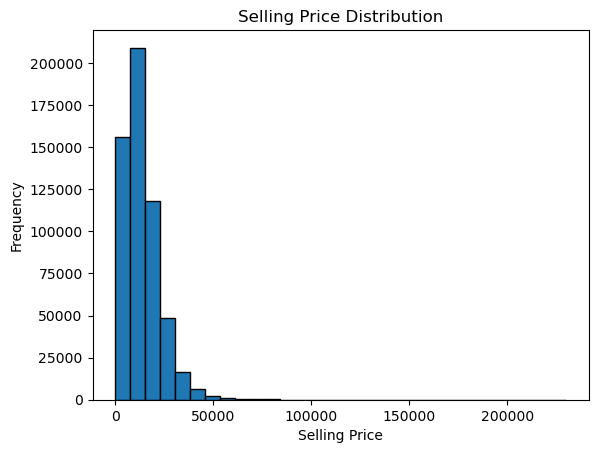

In [38]:
## create Selling price distribution graphic with using matplotlib library.
plt.hist(df['sellingprice'], bins=30, edgecolor='black')
plt.title('Selling Price Distribution')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.show()

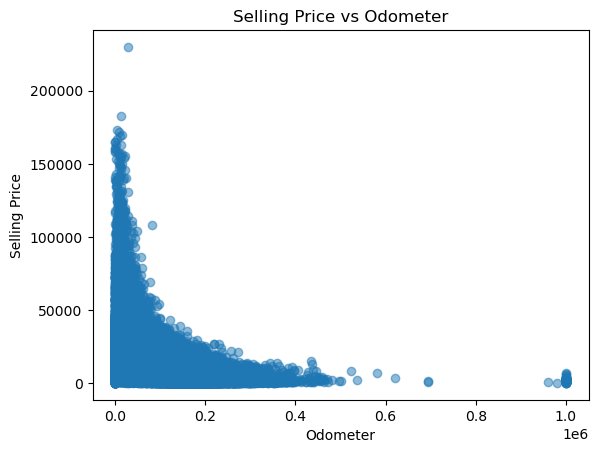

In [40]:
## Create scatter plot graphic
plt.scatter(df['odometer'], df['sellingprice'], alpha=0.5)
plt.title('Selling Price vs Odometer')
plt.xlabel('Odometer')
plt.ylabel('Selling Price')
plt.show()

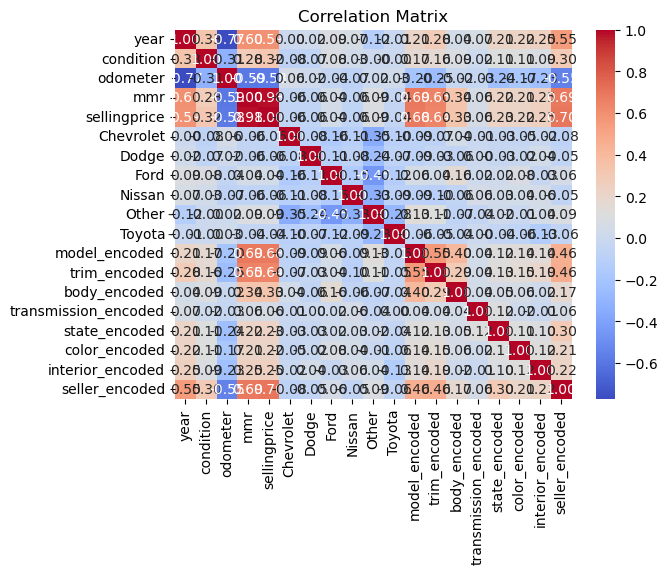

In [42]:
## create correlation matrix graphic
correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

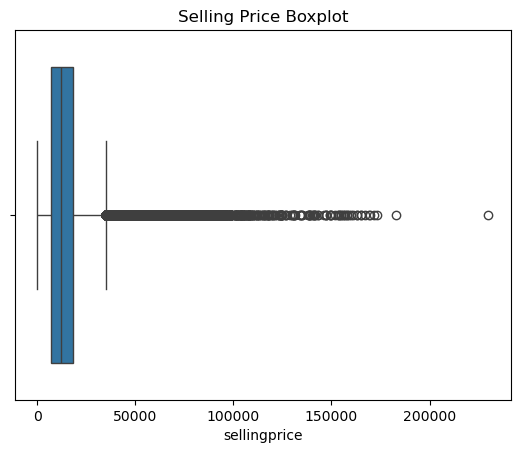

In [43]:
## Create selling price boxplot 
sns.boxplot(x=df['sellingprice'])
plt.title('Selling Price Boxplot')
plt.show()
## End of dataPreprocessing

In [46]:
## Begin of model development
## Since we will be working on different models, I copy the dataset into the objects I created with those model names.
df_LR=df.copy() ## Using for LinearRegression
df_RR=df.copy() ## Using for RidgeRegression
df_logistic=df.copy() ## Using for logistic Regression algorithm
df_cluster= df.copy() ## Using for cluster algorithm

In [366]:
## create linear regression model with using train test split

y = df_LR[["sellingprice"]]
x = df.drop(columns=["sellingprice"])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=20)
lr= LinearRegression()
model_lr=lr.fit(x_train,y_train)

In [374]:
## create ridge regression model with using train test split

x = df.drop(columns=["sellingprice"])
y = df["sellingprice"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=20)

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(x_train, y_train)


Ridge()

In [48]:
## for using logistic models, our target column that is selling price categorized.
df_logistic['sellingprice_category'] = pd.cut(df_logistic['sellingprice'], 
                                             bins=[0, 50000, 150000, 250000], 
                                             labels=['Low Price', 'Medium Price', 'High Price'])
df_logistic.drop("sellingprice",axis=1)

,year,condition,odometer,mmr,Chevrolet,Dodge,Ford,Nissan,Other,Toyota,model_encoded,trim_encoded,body_encoded,transmission_encoded,state_encoded,color_encoded,interior_encoded,seller_encoded,sellingprice_category
0,2015,5.0,16639.0,20500.0,0,0,0,0,1,0,14643.257923,10289.386104,15905.503680,13540.408506,14505.902786,14740.666805,15679.469698,16122.995733,Low Price
1,2015,5.0,9393.0,20800.0,0,0,0,0,1,0,14643.257923,10289.386104,15905.503680,13540.408506,14505.902786,14740.666805,13348.510794,16122.995733,Low Price
2,2014,45.0,1331.0,31900.0,0,0,0,0,1,0,16809.633106,29540.000000,11594.050401,13540.408506,14505.902786,13951.460566,15679.469698,29056.648361,Low Price
3,2015,41.0,14282.0,27500.0,0,0,0,0,1,0,13766.587164,16348.906742,11594.050401,13540.408506,14505.902786,14740.666805,15679.469698,25907.214429,Low Price
4,2014,43.0,2641.0,66000.0,0,0,0,0,1,0,55162.990741,36178.477223,11594.050401,13540.408506,14505.902786,13951.460566,15679.469698,29056.648361,Medium Price
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558832,2015,45.0,18255.0,35300.0,0,0,0,0,1,0,38557.377049,21070.141753,11594.050401,14772.286378,10715.572254,11781.096397,15679.469698,16222.673844,Low Price
558833,2012,5.0,54393.0,30200.0,0,0,0,0,1,0,32911.120043,30800.000000,21342.483584,13540.408506,13945.389563,14740.666805,15679.469698,30800.000000,Low Price
558834,2012,48.0,50561.0,29800.0,0,0,0,0,1,0,22717.871649,31894.131833,15905.503680,13540.408506,14505.902786,15508.987649,15679.469698,29056.648361,Low Price
558835,2015,38.0,16658.0,15100.0,0,0,0,1,0,0,11421.055765,11482.387442,12300.079704,13540.408506,12918.774504,14740.666805,15679.469698,11101.795213,Low Price


In [50]:
df_RFC=df_logistic.copy() ## Using for Random forest classifier
df_dbscan=df_logistic.copy() ## Using for dbscan

In [ ]:
## Logistic Regression
X = df_logistic.drop(columns=["sellingprice_category"]) 
y = df_logistic["sellingprice_category"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

logistic_model = LogisticRegression(max_iter=7000,solver='saga', multi_class='auto')

logistic_model.fit(X_train, y_train)

predictions = logistic_model.predict(X_test)

accuracy = accuracy_score(y_test, predictions)


In [ ]:
## Random Forest Classifier model
df_RFC['sellingprice_category'] = pd.cut(df_RFC['sellingprice'], 
                                             bins=[0, 50000, 150000, 250000], 
                                             labels=['Low Price', 'Medium Price', 'High Price'])
df_RFC.drop("sellingprice",axis=1)

X = df_RFC.drop(columns=["sellingprice_category"]) 
y = df_RFC["sellingprice_category"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

rf_model = RandomForestClassifier(n_estimators=100, random_state=20)

rf_model.fit(X_train, y_train)


In [52]:
## Cluster Algorithms
## Apply k-means algorithm
df_cluster.head()

,year,condition,odometer,mmr,sellingprice,Chevrolet,Dodge,Ford,Nissan,Other,Toyota,model_encoded,trim_encoded,body_encoded,transmission_encoded,state_encoded,color_encoded,interior_encoded,seller_encoded
0,2015,5.0,16639.0,20500.0,21500.0,0,0,0,0,1,0,14643.257923,10289.386104,15905.503680,13540.408506,14505.902786,14740.666805,15679.469698,16122.995733
1,2015,5.0,9393.0,20800.0,21500.0,0,0,0,0,1,0,14643.257923,10289.386104,15905.503680,13540.408506,14505.902786,14740.666805,13348.510794,16122.995733
2,2014,45.0,1331.0,31900.0,30000.0,0,0,0,0,1,0,16809.633106,29540.000000,11594.050401,13540.408506,14505.902786,13951.460566,15679.469698,29056.648361
3,2015,41.0,14282.0,27500.0,27750.0,0,0,0,0,1,0,13766.587164,16348.906742,11594.050401,13540.408506,14505.902786,14740.666805,15679.469698,25907.214429
4,2014,43.0,2641.0,66000.0,67000.0,0,0,0,0,1,0,55162.990741,36178.477223,11594.050401,13540.408506,14505.902786,13951.460566,15679.469698,29056.648361


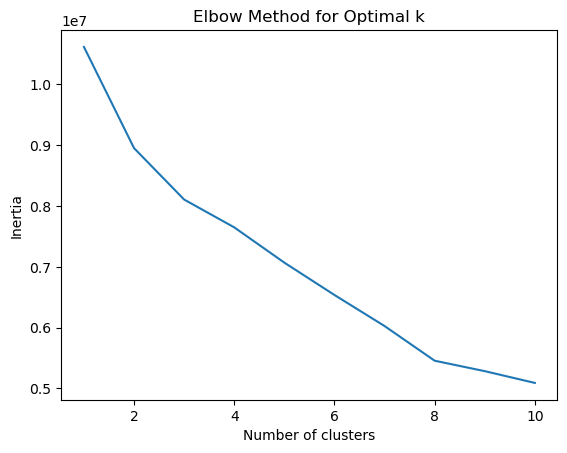

In [59]:
## define x and y values
X = df_cluster[['year', 'condition', 'odometer', 'mmr','Chevrolet','Dodge','Ford','Nissan','Other','Toyota', 'sellingprice', 'model_encoded', 
        'trim_encoded', 'body_encoded', 'transmission_encoded', 'state_encoded', 'color_encoded', 
        'interior_encoded', 'seller_encoded']] 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
inertia = []
for k in range(1, 11):  ## k values
    kmeans = KMeans(n_clusters=k, random_state=20)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Elbow graphic
plt.plot(range(1, 11), inertia)
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

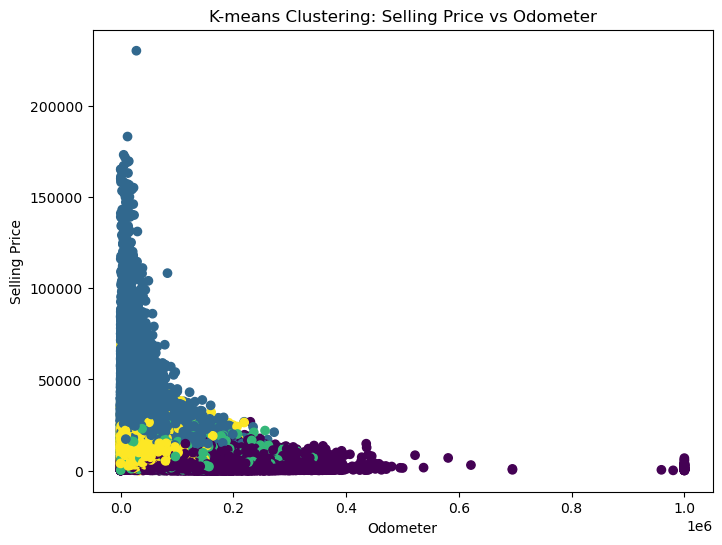

                year  condition       odometer           mmr  sellingprice
Cluster                                                                   
0        2004.929635  23.168993  130498.810259   4795.065068   4584.766570
1        2012.235084  36.039474   36365.233319  27625.507641  27525.657879
2        2010.583320  27.801924   70371.503366  11247.840309  11046.140034
3        2012.062182  33.905558   43158.028251  13702.594426  13565.417951


In [61]:
## elbow point determined 4
kmeans = KMeans(n_clusters=4, random_state=20)
df_cluster['Cluster'] = kmeans.fit_predict(X_scaled)

# set result graphic
plt.figure(figsize=(8, 6))
plt.scatter(df_cluster['odometer'], df_cluster['sellingprice'], c=df_cluster['Cluster'], cmap='viridis')
plt.title('K-means Clustering: Selling Price vs Odometer')
plt.xlabel('Odometer')
plt.ylabel('Selling Price')
plt.show()
cluster_summary = df_cluster.groupby('Cluster')[['year', 'condition', 'odometer', 'mmr', 'sellingprice']].mean()
print(cluster_summary)

In [368]:
## begin of Model Evaluation and Optimization
## Linear Regression Model Evaluation and Optimization
y_pred = model_lr.predict(x_test)

# R² Skoru
r2_score = model_lr.score(x_test, y_test)

# RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Root Mean Squared Error
# MAPE
mape = (abs((y_test - y_pred) / y_test)).mean() * 100

# Results
print(f"R² Score: {r2_score}")
print(f"RMSE: {rmse}")
print(f"MAPE: {mape}%")

R² Score: 0.9719233983986632
RMSE: 1633.3756242851396
MAPE: sellingprice    34.327357
dtype: float64%


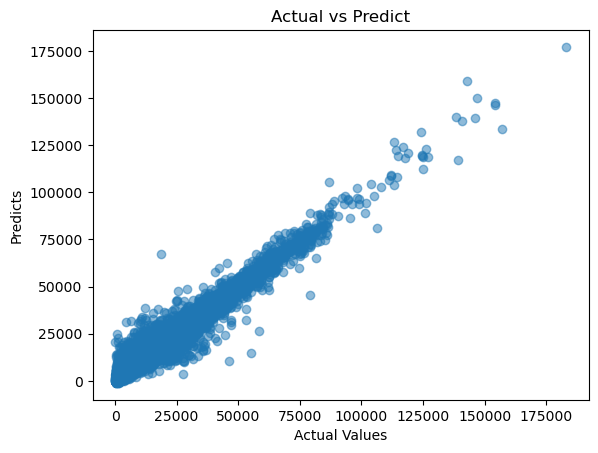

In [370]:
## difference between real and predict values

plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicts")
plt.title("Actual vs Predict")
plt.show()


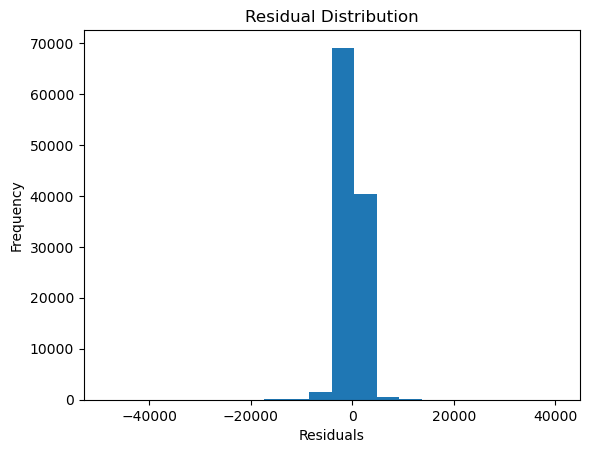

In [372]:
## Outlier points

residuals = y_test - y_pred
plt.hist(residuals, bins=20)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residual Distribution")
plt.show()


In [376]:
## Ridge Regression Model Evaluation and Optimization
y_pred = ridge_model.predict(x_test)

# R² score
r2_score = ridge_model.score(x_test, y_test)

# RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Root Mean Squared Error
# MAPE
mape = mean_absolute_percentage_error(y_test, y_pred) * 100

# Results
print(f"R² Score: {r2_score}")
print(f"RMSE: {rmse}")
print(f"MAPE: {mape}%")

R² Score: 0.9719233983280292
RMSE: 1633.3756263397283
MAPE: 34.32735690402082%


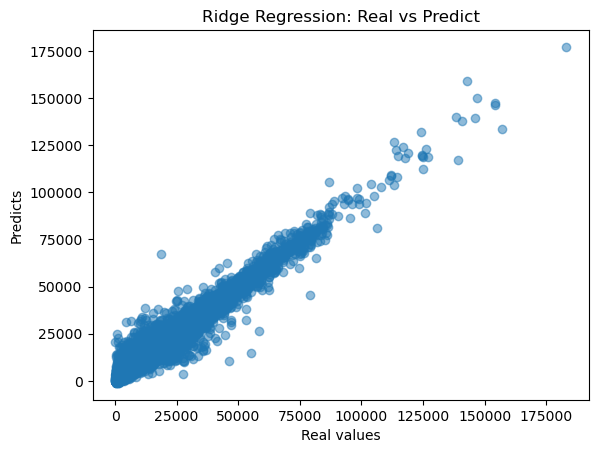

In [378]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Real values")
plt.ylabel("Predicts")
plt.title("Ridge Regression: Real vs Predict")
plt.show()


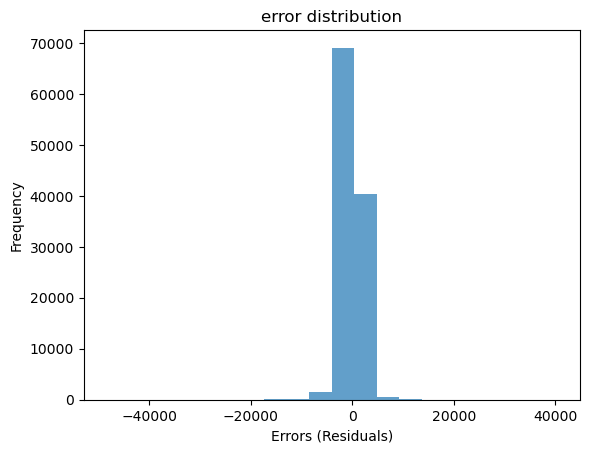

In [380]:
#convert y_test values to numpy array
y_test = y_test.values

# y_test to 1 dimension
y_test = y_test.ravel() 

# Residuals calculation 
residuals = y_test - y_pred

# Draw Histogram graphic
import matplotlib.pyplot as plt
plt.hist(residuals, bins=20, alpha=0.7)
plt.xlabel("Errors (Residuals)")
plt.ylabel("Frequency")
plt.title("error distribution")
plt.show()


Accuracy: 0.9999821057905661

Classification Report:
              precision    recall  f1-score   support

   Low Price       0.75      0.75      0.75         4
Medium Price       1.00      1.00      1.00    111060
  High Price       1.00      1.00      1.00       704

    accuracy                           1.00    111768
   macro avg       0.92      0.92      0.92    111768
weighted avg       1.00      1.00      1.00    111768


Confusion Matrix:
[[     3      0      1]
 [     0 111060      0]
 [     1      0    703]]


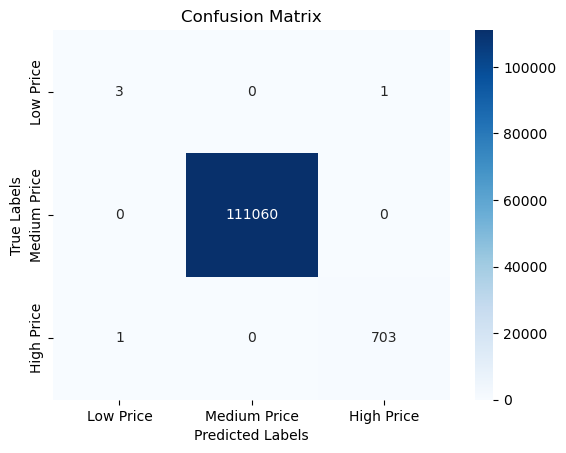

In [264]:
## Logistic Regression Model Evaluation and Optimization
# Accuracy
print(f"Accuracy: {accuracy}")

# Precision, Recall, F1-Score
print("\nClassification Report:")
print(classification_report(y_test, predictions, target_names=['Low Price', 'Medium Price', 'High Price']))

# Confusion Matrix
cm = confusion_matrix(y_test, predictions)
print("\nConfusion Matrix:")
print(cm)

# Confusion Matrix visuluzation
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Low Price', 'Medium Price', 'High Price'], yticklabels=['Low Price', 'Medium Price', 'High Price'])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


In [224]:
# incorrectly predicted examples
misclassified = X_test[y_test != predictions]
print("Misclassified Samples:\n", misclassified)


Misclassified Samples:
         year  condition  odometer       mmr  sellingprice   make_encoded  \
194738  2010        4.0   19836.0  146000.0      154000.0  153488.235294   
29989   2014        5.0     147.0  121000.0      139000.0   21590.566828   

        model_encoded   trim_encoded  body_encoded  transmission_encoded  \
194738  153488.235294   13870.029484  11594.050401          13540.408506   
29989    27932.016545  114333.333333  11594.050401          13540.408506   

        state_encoded  color_encoded  interior_encoded  seller_encoded  
194738   14505.902786   22294.040053      22294.040053   153222.222222  
29989    14505.902786   15508.987649      13348.510794    48100.000000  


In [ ]:
# Framework of Actual and Estimated Values
comparison_df = pd.DataFrame({
    'True Labels': y_test,
    'Predicted Labels': predictions
})

# Calculating frequencies for each class
true_counts = comparison_df['True Labels'].value_counts().sort_index()
pred_counts = comparison_df['Predicted Labels'].value_counts().sort_index()

# Bar Chart
plt.figure(figsize=(10, 6))
width = 0.4  # Çubuk genişliği
x = range(len(true_counts))

plt.bar(x, true_counts, width, label='True Labels', color='blue', alpha=0.7)
plt.bar([p + width for p in x], pred_counts, width, label='Predicted Labels', color='orange', alpha=0.7)

plt.xlabel("Classes")
plt.ylabel("Frequency")
plt.xticks([p + width / 2 for p in x], ['Low Price', 'Medium Price', 'High Price'])
plt.legend()
plt.title("True vs Predicted Class Distribution")
plt.show()


In [ ]:
## Random Forest Classifier Model Evaluation and Optimization
# Accuracy
print(f"Accuracy: {accuracy}")

# Precision, Recall, F1-Score
print("\nClassification Report:")
print(classification_report(y_test, predictions, target_names=['Low Price', 'Medium Price', 'High Price']))

# Confusion Matrix
cm = confusion_matrix(y_test, predictions)
print("\nConfusion Matrix:")
print(cm)

# Feature Importance
import matplotlib.pyplot as plt
import pandas as pd

feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
feature_importances.plot(kind='bar', color='teal')
plt.title("Feature Importances")
plt.ylabel("Importance Score")
plt.xlabel("Features")
plt.show()


In [ ]:
#incorrect predicts
misclassified = X_test[y_test != predictions]
print("Misclassified Samples:\n", misclassified)


In [ ]:
##display confustion matrix

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Low Price', 'Medium Price', 'High Price'], yticklabels=['Low Price', 'Medium Price', 'High Price'])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [63]:
## davies bouldin score calculation for k means

db_score = davies_bouldin_score(X_scaled, kmeans.labels_)
print(f"Davies-Bouldin Score: {db_score:.3f}")


Davies-Bouldin Score: 2.205


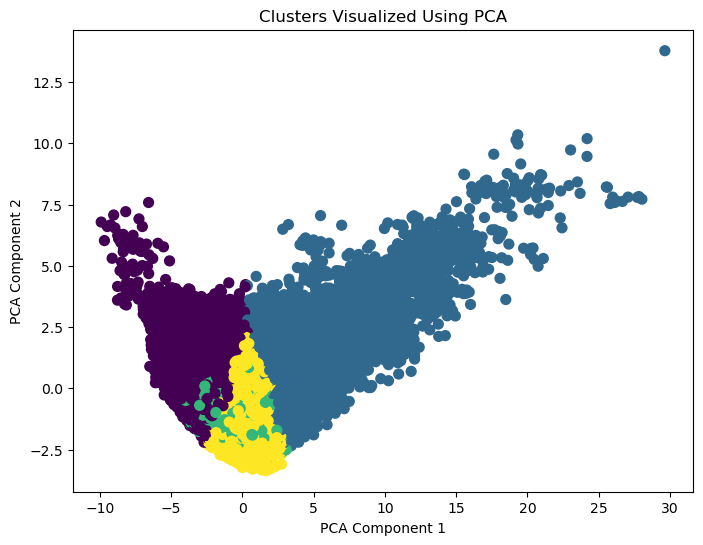

In [65]:
## Visuluzation using PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df_cluster['Cluster'], cmap='viridis', s=50)
plt.title("Clusters Visualized Using PCA")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()


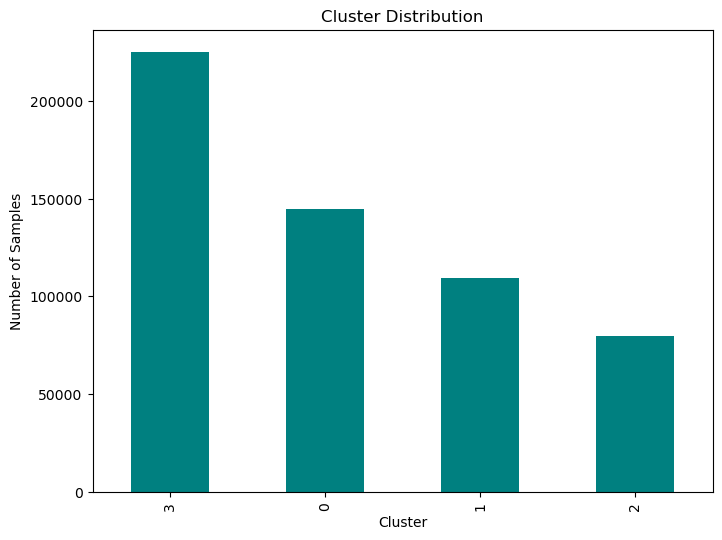

In [66]:
## Cluster Distribution graphic

cluster_counts = df_cluster['Cluster'].value_counts()

plt.figure(figsize=(8, 6))
cluster_counts.plot(kind='bar', color='teal')
plt.title("Cluster Distribution")
plt.xlabel("Cluster")
plt.ylabel("Number of Samples")
plt.show()
